<a href="https://colab.research.google.com/github/keerthivjr/Colab-Retinal-Disease-Classification/blob/main/retinal_fundus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
from keras.preprocessing import image
pd.options.display.max_columns = 50

In [ ]:
!unzip "/content/drive/MyDrive/Dataset/archive.zip"

Archive:  /content/drive/MyDrive/Dataset/archive.zip
  inflating: Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv  
  inflating: Evaluation_Set/Evaluation_Set/Validation/1.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/10.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/100.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/101.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/102.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/103.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/104.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/105.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/106.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/107.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/108.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/109.png  
  inflating: Evaluation_Set/Evaluation_Set/Validation/11.png  
  inflating: Evaluation_Set/Evaluation_Set/Val

In [ ]:

train_df = pd.read_csv('/content/Training_Set/Training_Set/RFMiD_Training_Labels.csv')
train_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1916,1917,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1917,1918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1918,1919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
val_df = pd.read_csv('/content/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv')

val_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636,637,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637,638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
638,639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df = pd.read_csv('/content/Test_Set/Test_Set/RFMiD_Testing_Labels.csv')
test_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636,637,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637,638,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
638,639,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df['img_path'] = [f'/content/Training_Set/Training_Set/Training/{id}.png' for id in train_df['ID']]

In [ ]:
train_df.head(5)

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,img_path
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Training_Set/Training_Set/Training/1.png
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Training_Set/Training_Set/Training/2.png
2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Training_Set/Training_Set/Training/3.png
3,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Training_Set/Training_Set/Training/4.png
4,5,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Training_Set/Training_Set/Training/5.png


In [ ]:
val_df['img_path'] = [f'/content/Evaluation_Set/Evaluation_Set/Validation/{id}.png' for id in val_df['ID']]
val_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,img_path
0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Evaluation_Set/Evaluation_Set/Validat...
1,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Evaluation_Set/Evaluation_Set/Validat...
2,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Evaluation_Set/Evaluation_Set/Validat...
3,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Evaluation_Set/Evaluation_Set/Validat...
4,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Evaluation_Set/Evaluation_Set/Validat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Evaluation_Set/Evaluation_Set/Validat...
636,637,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Evaluation_Set/Evaluation_Set/Validat...
637,638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Evaluation_Set/Evaluation_Set/Validat...
638,639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Evaluation_Set/Evaluation_Set/Validat...


In [ ]:
test_df['img_path'] = [f'/content/Test_Set/Test_Set/Test/{id}.png' for id in test_df['ID']]
test_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,img_path
0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Test_Set/Test_Set/Test/1.png
1,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Test_Set/Test_Set/Test/2.png
2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Test_Set/Test_Set/Test/3.png
3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Test_Set/Test_Set/Test/4.png
4,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Test_Set/Test_Set/Test/5.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Test_Set/Test_Set/Test/636.png
636,637,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Test_Set/Test_Set/Test/637.png
637,638,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Test_Set/Test_Set/Test/638.png
638,639,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/content/Test_Set/Test_Set/Test/639.png


In [ ]:
train_df = train_df.drop(labels=['ID'],axis=1)

In [ ]:
columns = list(train_df.columns)
columns.remove('img_path')
d_total = 0
for col in columns:
    print(col)
    print(train_df[col].value_counts())
    print('----------------')
    if col != 'Disease_Risk':
        d_total += train_df[col].sum()

print(d_total)

Disease_Risk
Disease_Risk
1    1519
0     401
Name: count, dtype: int64
----------------
DR
DR
0    1544
1     376
Name: count, dtype: int64
----------------
ARMD
ARMD
0    1820
1     100
Name: count, dtype: int64
----------------
MH
MH
0    1603
1     317
Name: count, dtype: int64
----------------
DN
DN
0    1782
1     138
Name: count, dtype: int64
----------------
MYA
MYA
0    1819
1     101
Name: count, dtype: int64
----------------
BRVO
BRVO
0    1847
1      73
Name: count, dtype: int64
----------------
TSLN
TSLN
0    1734
1     186
Name: count, dtype: int64
----------------
ERM
ERM
0    1906
1      14
Name: count, dtype: int64
----------------
LS
LS
0    1873
1      47
Name: count, dtype: int64
----------------
MS
MS
0    1905
1      15
Name: count, dtype: int64
----------------
CSR
CSR
0    1883
1      37
Name: count, dtype: int64
----------------
ODC
ODC
0    1638
1     282
Name: count, dtype: int64
----------------
CRVO
CRVO
0    1892
1      28
Name: count, dtype: int64
-------

In [ ]:
train_df = train_df.drop(labels=['Disease_Risk','ODPM', 'HR'], axis=1)
val_df = val_df.drop(labels=['ID', 'Disease_Risk', 'ODPM', 'HR'], axis=1)
test_df = test_df.drop(labels=['ID', 'Disease_Risk', 'ODPM', 'HR'], axis=1)


In [ ]:
train_df.columns

Index(['DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN', 'ERM', 'LS', 'MS',
       'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST', 'AION', 'PT',
       'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS', 'CB', 'PRH',
       'MNF', 'CRAO', 'TD', 'CME', 'PTCR', 'CF', 'VH', 'MCA', 'VS', 'BRAO',
       'PLQ', 'HPED', 'CL', 'img_path'],
      dtype='object')

In [ ]:
train_df[train_df['PTCR']==1]

,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,PRH,MNF,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,img_path
482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,/content/Training_Set/Training_Set/Training/48...
542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,/content/Training_Set/Training_Set/Training/54...
637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,/content/Training_Set/Training_Set/Training/63...
942,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,/content/Training_Set/Training_Set/Training/94...
982,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,/content/Training_Set/Training_Set/Training/98...


In [ ]:
def weight_calc(col):
    total = len(train_df)
    weight = (1 / train_df[col].sum()) *  total / 2
    return weight

In [ ]:
Y_train = list(train_df.drop(['img_path'], axis=1).columns)
Y_val = list(val_df.drop(['img_path'], axis=1).columns)
Y_test = list(test_df.drop(['img_path'], axis=1).columns)
unq_disease = len(Y_train)

In [ ]:
class_weights = {}
for i in range(0, unq_disease):
    class_weights[f'{i}'] = weight_calc(Y_train[i])

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rotation_range=90,
                                                                brightness_range=[0, 0.1])
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(train_df,
                                              x_col='img_path',
                                              y_col=Y_train,
                                              target_size=(150,150),
                                              class_mode='raw',
                                              batch_size=16,
                                              shuffle=True)

Found 1920 validated image filenames.


In [ ]:
val_gen = val_datagen.flow_from_dataframe(val_df,
                                          x_col='img_path',
                                          y_col=Y_val,
                                          target_size=(150,150),
                                          class_mode='raw',
                                          batch_size=8)

Found 640 validated image filenames.


In [ ]:
test_gen = test_datagen.flow_from_dataframe(test_df,
                                            x_col='img_path',
                                            y_col=Y_test,
                                            target_size=(150,150),
                                            class_mode='raw')

Found 640 validated image filenames.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras

In [ ]:
model_1 = EfficientNetB0(input_shape=(150,150,3), weights='imagenet', include_top=False)

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
pre_trained_model = InceptionV3(input_shape = (150,150, 3),
                                include_top = False,
                                weights = None)
# pre_trained_model.load_weights(local_weights_file)
for layer in pre_trained_model.layers:
  layer.trainable = False
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense (1, activation='sigmoid')(x)
model = Model( pre_trained_model.input, x)
model.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model_1.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 150, 150, 3)          0         ['normalization[0

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
x = model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

In [ ]:
m = Model(inputs=model.input, outputs=predictions)
m.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0]

In [ ]:
m.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
results = m.fit(train_gen,epochs=10,
                              steps_per_epoch=20,
                              validation_data=val_gen,
                             validation_steps=5)

Epoch 1/10
20/20 [==============================] - 70s 3s/step - loss: 0.6574 - accuracy: 0.9752 - val_loss: 0.6318 - val_accuracy: 0.9773
Epoch 2/10
20/20 [==============================] - 55s 3s/step - loss: 0.6302 - accuracy: 0.9740 - val_loss: 0.5995 - val_accuracy: 0.9791
Epoch 3/10
20/20 [==============================] - 54s 3s/step - loss: 0.5973 - accuracy: 0.9745 - val_loss: 0.5664 - val_accuracy: 0.9808
Epoch 4/10
20/20 [==============================] - 53s 3s/step - loss: 0.5712 - accuracy: 0.9752 - val_loss: 0.5396 - val_accuracy: 0.9715
Epoch 5/10
20/20 [==============================] - 60s 3s/step - loss: 0.5395 - accuracy: 0.9750 - val_loss: 0.5093 - val_accuracy: 0.9756
Epoch 6/10
20/20 [==============================] - 53s 3s/step - loss: 0.5118 - accuracy: 0.9740 - val_loss: 0.4828 - val_accuracy: 0.9733
Epoch 7/10
20/20 [==============================] - 63s 3s/step - loss: 0.4917 - accuracy: 0.9739 - val_loss: 0.4568 - val_accuracy: 0.9733
Epoch 8/10
20/20 [==

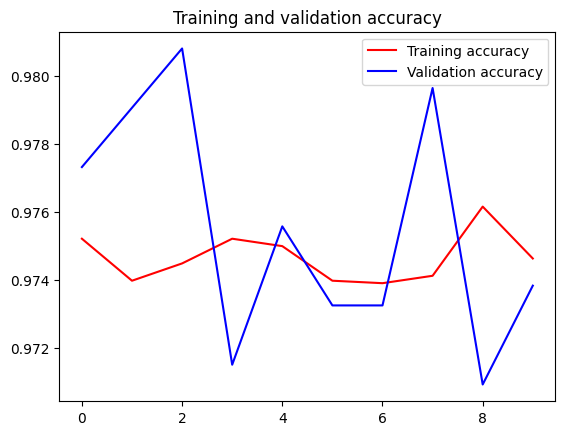

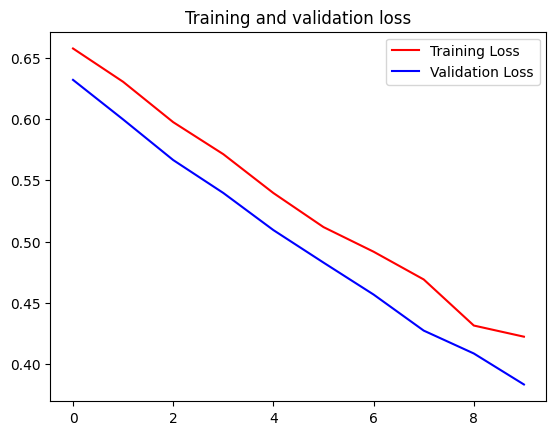

In [ ]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
m.evaluate(test_gen)

20/20 [==============================] - 96s 5s/step - loss: 0.3819 - accuracy: 0.9757


[0.38190752267837524, 0.9757264852523804]

In [ ]:
import os
import pandas as pd

# Set paths for test data
test_path = r"/content/Test_Set/Test_Set"
test_path_riadd = test_path.replace("\\", "/")
test_images_path = os.path.join(test_path_riadd, "Test")
path1=r"/content/Test_Set/Test_Set"
path_riadd1 = path1.replace("\\", "/")
test_csv_path = os.path.join(path_riadd1, "RFMiD_Testing_Labels.csv")

In [ ]:
# Load the test data CSV
test_df = pd.read_csv(test_csv_path)

In [ ]:
# List of diseases to group into "OTHER"
diseases_to_group = ["CWS", "CB", "ODPM", "PRH", "MNF", "HR", "CRAO", "TD", "CME",
                     "PTCR", "CF", "VH", "MCA", "VS", "BRAO", "PLQ", "HPED", "CL"]
# Add a new column 'OTHER' and set it to 0 initially
test_df['OTHER'] = 0

# Iterate over the diseases to group
for disease in diseases_to_group:
    # Check if the disease column exists before updating 'OTHER'
    if disease in test_df.columns:
        test_df['OTHER'] += test_df[disease]

# Drop the individual disease columns that are now grouped
test_df.drop(diseases_to_group, axis=1, inplace=True, errors='ignore')

In [ ]:
!pip install aucmedi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.3/359.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 35.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import tensorflow as tf

# Check if "OTHER" is present in the DataFrame columns
if "OTHER" not in test_df.columns:
    # If not, add "OTHER" to the DataFrame
    test_df["OTHER"] = 0

# Save the modified DataFrame back to the CSV file
output_csv_path ="/content/Test_Set/Test_Set/RFMiD_Testing_Labels.csv"
test_df.to_csv(output_csv_path, index=False)

from aucmedi import input_interface

# Continue only if "OTHER" is present in the DataFrame columns
if "OTHER" in test_df.columns:
    # Provide paths to imaging and annotation data
    test_images_path = os.path.join(test_path_riadd, "Test")

    # Use modified cols in the input interface
    ds = input_interface(interface="csv", path_imagedir=test_images_path,
                         path_data=output_csv_path, ohe=True, col_sample="ID",
                         ohe_range=test_df.columns.tolist())
    (index_list, class_ohe, nclasses, class_names, image_format) = ds

NameError: name 'test_df' is not defined

In [ ]:
#define Custom Scale Layer
class CustomScaleLayer(tf.keras.layers.Layer):
    def __init__(self, scale=1.0, **kwargs):
        super(CustomScaleLayer, self).__init__(**kwargs)
        self.scale_factor = scale

    def call(self, inputs):
        # Ensure inputs is a list or tuple of tensors
        if not isinstance(inputs, (list, tuple)):
            inputs = [inputs]

        # Apply scaling to each input tensor
        scaled_inputs = [x * self.scale_factor for x in inputs]

        # Return a single tensor or a list of scaled tensors
        return scaled_inputs[0] if len(scaled_inputs) == 1 else scaled_inputs

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set up ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Correct input size for EfficientNetB4
input_shape = (380, 380)

In [ ]:
# Define batch size
batch_size = 32
file_extension = '.png'
test_df['ID'] = test_df['ID'].apply(lambda x: str(x) + file_extension)

NameError: name 'test_df' is not defined

In [ ]:
# Create test generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_images_path,
    x_col="ID",
    y_col=None,
    class_mode=None,
    target_size=input_shape,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
# #testing the model
# from tensorflow.keras.models import load_model

# model_path = r"models/classifier_InceptionResNetV2/model.new2.h5"
# model = load_model(model_path,custom_objects={'CustomScaleLayer': CustomScaleLayer})
# Load the model
from tensorflow.keras.models import load_model
model_path = r"/content/drive/MyDrive/Dataset/model.new2.h5"
model = load_model(model_path, custom_objects={'CustomScaleLayer': CustomScaleLayer})

In [ ]:
# Predict probabilities for test data
predictions = model.predict(test_generator)

In [ ]:
import pandas as pd

data1 = {'y_actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data1)
print(df)

In [ ]:
# Apply threshold to predictions to convert probabilities to binary values (0 or 1)
threshold = 0.5
predictions_binary = (predictions > threshold).astype(int)

# Create a DataFrame for binary predictions

predictions_df = pd.DataFrame(predictions_binary, columns=class_names[1:])

# Add index to predictions_df
predictions_df['ID'] = test_df['ID']

# Save the binary predictions to a new CSV file
#predictions_binary_csv_path = os.path.join(test_path, "predictions_binary.csv")
predictions_binary_csv_path = "/content/drive/MyDrive/Dataset/predictions_binary.csv"
predictions_df.to_csv(predictions_binary_csv_path, index=False)
print("Binary predictions saved to:", predictions_binary_csv_path)

In [ ]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame(predictions, columns=class_names[1:])

In [ ]:
# Add index to predictions_df
predictions_df['ID'] = test_df['ID']

In [ ]:
# Save the predictions to a new CSV file
predictions_csv_path = "/content/drive/MyDrive/Dataset/predictions.csv"
predictions_df.to_csv(predictions_csv_path, index=False)
print("Predictions saved to:", predictions_csv_path)

In [ ]:
import os
import pandas as pd
from sklearn.metrics import classification_report

# Load the test data CSV
test_csv_path = r"/content/Test_Set/Test_Set/RFMiD_Testing_Labels.csv"
test_df = pd.read_csv(test_csv_path)

# Load the binary predictions CSV file generated from the test code
predictions_binary_csv_path = r"/content/drive/MyDrive/Dataset/predictions_binary.csv"
predictions_df = pd.read_csv(predictions_binary_csv_path)

# Extract true labels from the test data
true_labels = test_df[class_names[1:]].values

# Extract predicted labels from the predictions dataframe
predicted_labels = predictions_df[class_names[1:]].values

# Compute and print the classification report
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_names[1:])
print("Classification Report:\n", classification_rep)

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix = pd.crosstab(df['y_actual'], df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])
#confusion_matrix = pd.crosstab(df['y_actual'], df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

## Comparison result

In [ ]:
Gradientboosting=[0.63894,0.073074,0.915913,0.045248,0.45674,0.3546]
CNN=[0.71894,0.099712,0.909879,0.08962,0.5674,0.4542]
cnn_Efficientnetb0 = [ 0.9577910232544,0.94741259634494781,0.9464285969734192,0.95934802889823914,0.9375,0.99411]

In [ ]:
Data=zip(Gradientboosting,CNN,cnn_Efficientnetb0)

In [ ]:
import pandas as pd

Data=pd.DataFrame(Data,index=['Accuracy','Recall','Precision','matthews_correlation','Sensitivity','Specificity'],columns= ['Gradientboosting','CNN','cnn_Efficientnetb0'])

In [ ]:
Data

,Gradientboosting,CNN,cnn_Efficientnetb0
Accuracy,0.638940,0.718940,0.957791
Recall,0.073074,0.099712,0.947413
Precision,0.915913,0.909879,0.946429
matthews_correlation,0.045248,0.089620,0.959348
Sensitivity,0.456740,0.567400,0.937500
Specificity,0.354600,0.454200,0.994110


<Axes: >

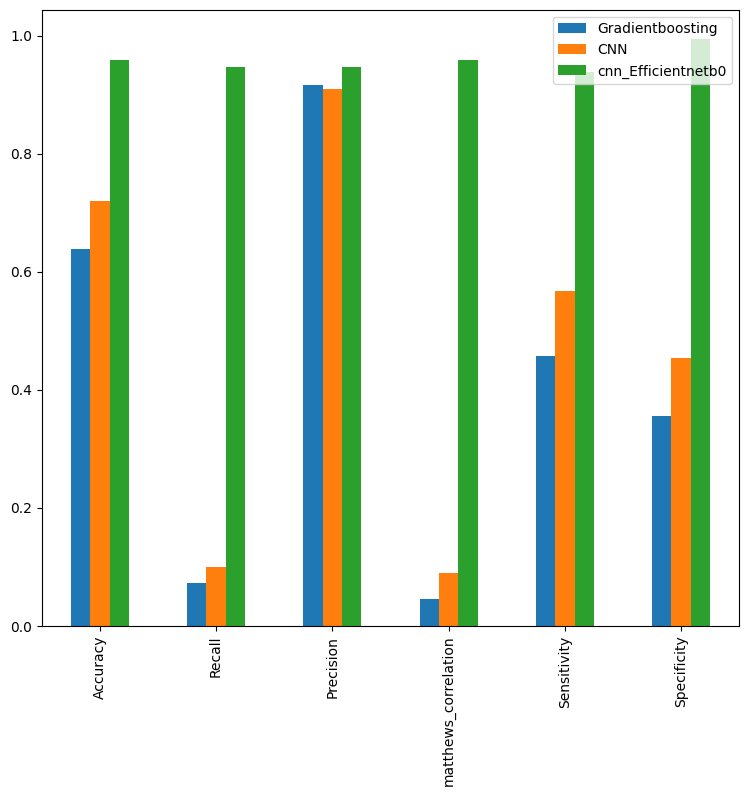

In [ ]:
Data.plot(y=['Gradientboosting','CNN','cnn_Efficientnetb0'], kind="bar", figsize=(9, 8))

<Axes: >

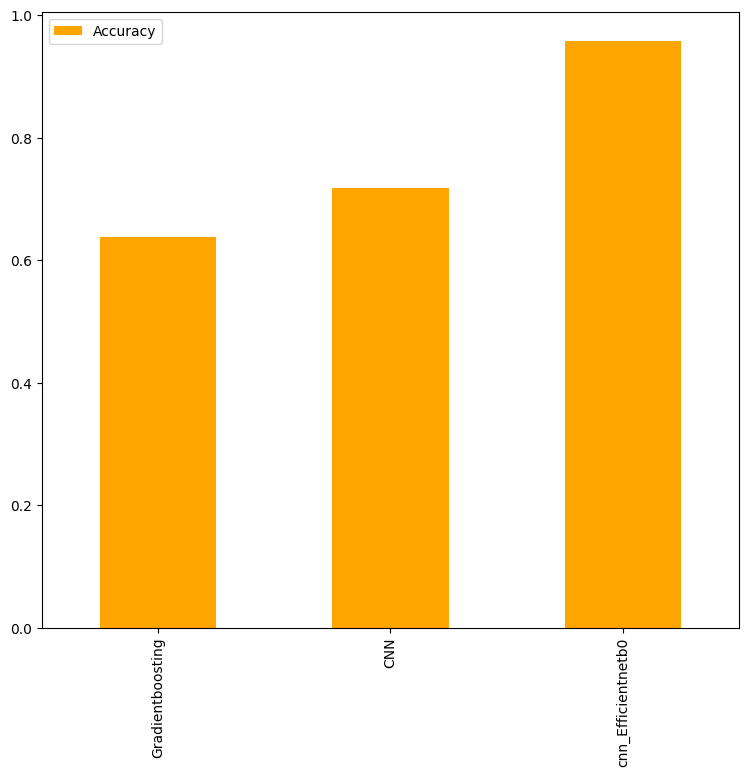

In [ ]:
Data.T.plot(y=['Accuracy'],kind='bar',figsize=(9,8),color='orange')
